In [18]:
%load_ext autoreload
%autoreload 2
import ipyrad
import ipyrad.analysis as ipa
import ipcoal
import matplotlib.pyplot as plt
import msprime
import numpy as np
import pandas as pd
import toytree
import toyplot

from IPython.display import SVG, display
from scipy.stats import entropy, ks_2samp
def show_svg(f):
    display(SVG(filename=f))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


000010111100110001001
000101000010001010000
000010111100110001001
000010111100100001011
000000111101000101100
000010111100110001001
000010111100100001001
000010111100100001001
000010111100100001001
111100000010001000000
0.006511111111111112
0.006120000000000002


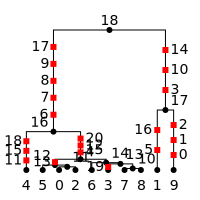

In [16]:
ts = msprime.simulate(sample_size=10, Ne=10000, mutation_rate=1e-7, length=1e3)
tree = next(ts.trees())
f = "/tmp/wat.svg"
tree.draw(f)
for x in ts.haplotypes():
    print(x)
print(ts.get_pairwise_diversity()/1e3)
print(ts.divergence(sample_sets=[range(5), range(5,10)]))
show_svg(f)

In [25]:
import msprime

length = 1000
m = 0.1
def sim(m=m, sample_size=10, reps=10):
    # stepping stone migration
    migration_matrix = [[0, m, 0], [m, 0, m], [0, m, 0]]
    post_ext_migration_matrix = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    population_configurations = [
        msprime.PopulationConfiguration(sample_size=sample_size),
        msprime.PopulationConfiguration(sample_size=sample_size),
        msprime.PopulationConfiguration(sample_size=sample_size)]

    df = pd.DataFrame([], index=["pi1", "pi2", "pi3", "pi_tot", "div"])
    for rep in range(reps):
        ts = msprime.simulate(Ne=10000,
                                         migration_matrix=migration_matrix,
                                         population_configurations=population_configurations,
                                        mutation_rate=1e-6, length=length)
        #print(list(tree_sequence.samples()))
        pi1 = ts.pairwise_diversity(samples=range(sample_size))
        pi2 = ts.pairwise_diversity(samples=range(sample_size, 2*sample_size))
        pi3 = ts.pairwise_diversity(samples=range(2*sample_size, 3*sample_size))
        pi_tot = ts.pairwise_diversity()
        div = ts.divergence(sample_sets=[range(sample_size),
                                                      range(2*sample_size, 3*sample_size)])
        df[rep] = np.array([pi1, pi2, pi3, pi_tot, div])/length

    return df

for m in [1e-6, 1e-5, 0.001, 0.1]:
    print(m)
    df = sim(m=m, reps=10)
    display(df)
#    _ = plt.hist(np.abs((pi1s+pi2s+pi4s)/3-pi3s), label=m, alpha=0.5, bins=30)
#_ = plt.legend()
#df

1e-06


,0,1,2,3,4,5,6,7,8,9
pi1,0.029,1.524,0.042,0.026,0.048,0.026,0.083,1.862e-02,3.893e-02,0.026
pi2,0.053,0.025,0.037,0.040,0.042,0.071,0.048,6.304e-02,3.711e-02,0.272
pi3,0.050,0.019,0.044,0.042,0.028,0.073,0.051,9.239e-01,5.082e-02,0.057
pi_tot,2.247,0.913,2.796,0.868,2.123,1.226,3.005,4.654e-01,1.945e-01,1.194
div,0.004,0.001,0.006,0.001,0.004,0.003,0.006,7.534e-04,2.881e-04,0.002


1e-05


,0,1,2,3,4,5,6,7,8,9
pi1,1.480e-01,4.520e-02,3.938e-02,2.614e-01,2.596e-01,1.212e-01,2.629e-02,5.138e-02,8.562e-02,6.876e-02
pi2,1.451e-01,1.814e-01,5.624e-02,1.029e-01,7.462e-02,1.281e-01,7.576e-02,1.070e-01,8.047e-02,2.658e-02
pi3,3.789e-02,5.404e-02,2.409e-01,4.080e-02,2.832e-01,5.333e-02,3.049e-02,1.379e-01,3.264e-02,2.113e-01
pi_tot,1.970e-01,4.387e-01,1.975e-01,3.562e-01,2.614e-01,1.877e-01,9.012e-02,1.719e-01,1.925e-01,1.640e-01
div,2.687e-04,8.264e-04,3.141e-04,6.013e-04,3.847e-04,2.807e-04,1.301e-04,2.400e-04,3.308e-04,2.635e-04


0.001


,0,1,2,3,4,5,6,7,8,9
pi1,1.585e-01,9.302e-02,1.808e-01,6.249e-02,1.111e-01,1.579e-01,1.395e-01,1.305e-01,1.222e-01,1.146e-01
pi2,1.180e-01,6.196e-02,1.826e-01,8.227e-02,1.103e-01,1.556e-01,1.449e-01,1.311e-01,9.773e-02,1.342e-01
pi3,1.689e-01,9.173e-02,1.867e-01,7.547e-02,1.065e-01,1.611e-01,1.456e-01,1.214e-01,1.226e-01,1.331e-01
pi_tot,1.604e-01,8.488e-02,1.758e-01,7.163e-02,1.062e-01,1.591e-01,1.410e-01,1.231e-01,1.107e-01,1.228e-01
div,1.583e-04,9.224e-05,1.756e-04,6.492e-05,1.021e-04,1.669e-04,1.381e-04,1.188e-04,1.129e-04,1.168e-04


0.1


,0,1,2,3,4,5,6,7,8,9
pi1,1.523e-01,1.533e-01,9.278e-02,2.217e-01,6.284e-02,6.173e-02,2.453e-01,1.099e-01,6.729e-02,1.086e-01
pi2,4.742e-02,1.562e-01,7.480e-02,2.126e-01,7.158e-02,6.078e-02,2.267e-01,1.107e-01,1.408e-01,8.518e-02
pi3,2.129e-01,2.610e-01,1.029e-01,2.360e-01,9.833e-02,8.451e-02,2.415e-01,1.422e-01,1.234e-01,6.302e-02
pi_tot,1.478e-01,2.027e-01,9.846e-02,2.107e-01,7.872e-02,6.732e-02,2.285e-01,1.243e-01,1.143e-01,8.896e-02
div,1.805e-04,2.458e-04,9.678e-05,2.112e-04,8.494e-05,7.128e-05,2.236e-04,1.373e-04,1.006e-04,9.754e-05
